# Epsilon Greedy

2023 Reinforcement Learning

Kyung Hee University

# Environment: Frozen Lake

Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.

- Action Space : Discrete(4)
- Observation Space : Discrete(64)

## Action Space
The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:

0: LEFT

1: DOWN

2: RIGHT

3: UP

## Observation Space
the 8x8 map has 64 possible observations.

## Rewards
Reach goal(G): +1

Reach hole(H): 0

Reach frozen(F): 0

# Example (4X4 Frozen Lake)
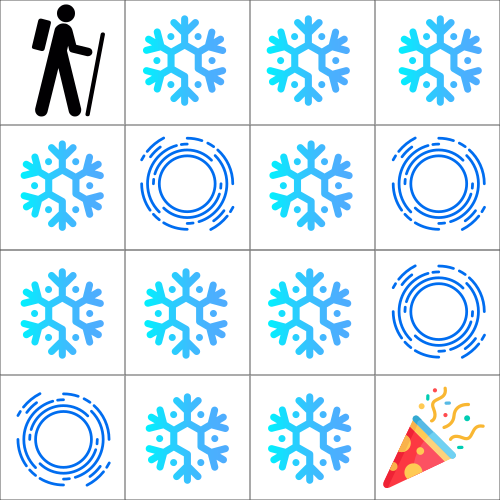

In [1]:
import numpy as np 
import gym
import random
from gym.envs.registration import register
import matplotlib.pyplot as plt

if 'FrozenLake8x8NotSlippery-v0' in gym.envs.registry.env_specs:
    del gym.envs.registry.env_specs['FrozenLake8x8NotSlippery-v0']

register(
    id='FrozenLake8x8NotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196
)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:440: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(


# Hyperparameter

In [2]:
n_episodes = 10000
gamma = 1.0
lr=1e-2

score_mc = []
score_e_mc = []

score_td = []
score_e_td = []

# Action Function

In [3]:
# Exploitation
def greedy_action(state,Q):

  action=np.argmax(Q[state,:])

  return action

# Exploration
def e_greedy_action(state,Q,epsilon):
  
  if np.random.rand() < epsilon:
      action = env.action_space.sample()
  else:
      action = np.argmax(Q[state, :])

  return action

# MC

In [4]:
# MC
env = gym.make("FrozenLake8x8NotSlippery-v0")
s_q = np.zeros([env.observation_space.n, env.action_space.n])
n_q = np.zeros([env.observation_space.n, env.action_space.n])
print(s_q.shape)
Reward_list = []
score_mc = []

for i in range(n_episodes):

    state = env.reset()
    transit_list = []
    G = 0.0
    done = False
    
    while not done:

        action = greedy_action(state,s_q)
        new_state, reward, done, _ = env.step(action)
        G = G + reward
        transit_list.append((state, action))
        state = new_state

    Reward_list.append(G)

    for (state, action) in transit_list:
      n_q[state, action] += 1.0
      learning_rate = 1.0 / n_q[state, action]
      s_q[state, action] += learning_rate * (G - s_q[state, action])
      # moving reward: 0, gamma: 1 이므로, 최종 GT 값이 전체 state의 Gt 와 동일

    if (i+1) % 1000 == 0:
      print("Current score: {:.3f}".format(sum(Reward_list) / i))
      score_mc.append(sum(Reward_list)/i)

env.close()

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


(16, 4)
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000


# e-greedy MC

In [5]:
# e-greedy MC
env.close()
env = gym.make("FrozenLake8x8NotSlippery-v0")
s_q = np.zeros([env.observation_space.n, env.action_space.n])
n_q = np.zeros([env.observation_space.n, env.action_space.n])
Reward_list = []
score_e_mc = []

current_epsilon=1.0
k = 1.0
learning_rate = 0.1

for i in range(n_episodes):

    state = env.reset()
    transit_list = []
    G = 0.0
    done = False

    while not done:
        current_epsilon = 1.0 / (k*0.01)
        action = e_greedy_action(state,s_q,current_epsilon)
        new_state, reward, done, _ = env.step(action)
        G = G + reward
        transit_list.append((state, action))
        state = new_state
    
    k = k + 1.0
    Reward_list.append(G)

    for (state, action) in transit_list:
      n_q[state, action] += 1.0
      # learning_rate = 1.0 / n_q[state, action]
      s_q[state, action] += learning_rate * (G - s_q[state, action])

    if (i+1) % 1000 == 0:
      print("Current score: {:.3f}".format(sum(Reward_list) / i))
      score_e_mc.append(sum(Reward_list)/i)


env.close()

Current score: 0.611
Current score: 0.768
Current score: 0.829
Current score: 0.861
Current score: 0.882
Current score: 0.899
Current score: 0.911
Current score: 0.920
Current score: 0.927
Current score: 0.933


# Visualization

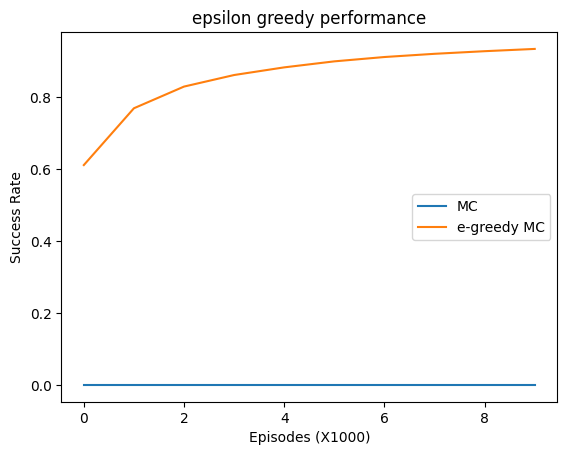

In [6]:
plt.title("epsilon greedy performance")
plt.plot(np.arange(len(score_mc)),score_mc)
plt.plot(np.arange(len(score_e_mc)),score_e_mc)
plt.xlabel("Episodes (X1000)")
plt.ylabel("Success Rate")
plt.legend(["MC","e-greedy MC"])
plt.show()